# **Importing the data**

In [1]:
import pandas as pd

# File path for the dataset
file_path = r'C:\Users\IpsitMohanty\Documents\Dropouts 30 dis.xlsx'

# Load the data from the Excel file
dropout_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
dropout_data.sheet_names


['Sheet2', 'Sheet3']

In [2]:
# Load the data from Sheet2 only
sheet2_data = pd.read_excel(file_path, sheet_name='Sheet2')

# Display the first 5 rows of the data to understand its structure
sheet2_data.head()


,District Name,District Code,Block Name,Block Code,Last Udise Code,Last School Name,Student Permanent Education No.,Students State Code,Student Name,Gender,Mobile No.,Aadhaar No.,Mother Name,Father Name,Student Status,Student Sub Status,Remarks,Last Class,Eligible Class to Import,Academic Year
0,ANGUL,2115,ANGUL,211501,21150100152,PANCHAYAT HS ANGARABANDHA,21519812186,2115030410100415,SWAGATIKA BEHERA,FEMALE,8658968025,********1200,KUMUDINI BEHERA,SURYAKANTA BEHERA,DROPBOX - MID SESSION,Dropout,Others Reasons,8,8,2024-25
1,ANGUL,2115,ANGUL,211501,21150100153,"ODISHA ADARSHA VIDYALAYA, KHANDAHATA",21530868099,2115010020100151,JASOBANT BEHERA,MALE,9337072894,********1101,SANTOSHEE BEHERA,JAYANT BEHERA,DROPBOX - END SESSION,Dropout,Others Reasons,10,10,2024-25
2,ANGUL,2115,ANGUL,211501,21150100153,"ODISHA ADARSHA VIDYALAYA, KHANDAHATA",21713339613,2115010020100264,SAKTI SAHU,MALE,9337072894,********7498,ABANTI SAHU,SUSIL SAHU,DROPBOX - END SESSION,Dropout,Others Reasons,10,10,2024-25
3,ANGUL,2115,ANGUL,211501,21150109352,"KIDS CARE SCHOOL,PURUNAGARH",20999838544,NaN,ARIYAN BHUTIA,MALE,8117830521,NaN,MAMATANAYEE BEHERA,ANIL KUMAR BHUTIA,DROPBOX - MID SESSION,Dropout,Others Reasons,PP1,PP1,2024-25
4,ANGUL,2115,ANGUL,211501,21150111501,KHALARI NODAL HS,21731385433,2115011150100143,BIJESH NAIK,MALE,8327731987,********3818,PUSPALATA NAIK,RADHAKANTA NAIK,DROPBOX - MID SESSION,Dropout,Employment,9,9,2024-25


 # **1. Dropouts by Districts**


In [35]:
# Calculate total dropouts by district
district_wise_counts = sheet2_data['District Name'].value_counts().reset_index()
district_wise_counts.columns = ['District Name', 'Dropout Count']

# Display the first 30 rows of the result
district_wise_counts.head(30)

## Save this image



,District Name,Dropout Count
0,KALAHANDI,5035
1,SUNDERGARH,4014
2,RAYAGADA,4007
3,NABARANGPUR,3808
4,GANJAM,3141
5,MAYURBHANJ,3076
6,KORAPUT,2951
7,KHURDHA,2611
8,BARAGARH,2124
9,NUAPADA,1707


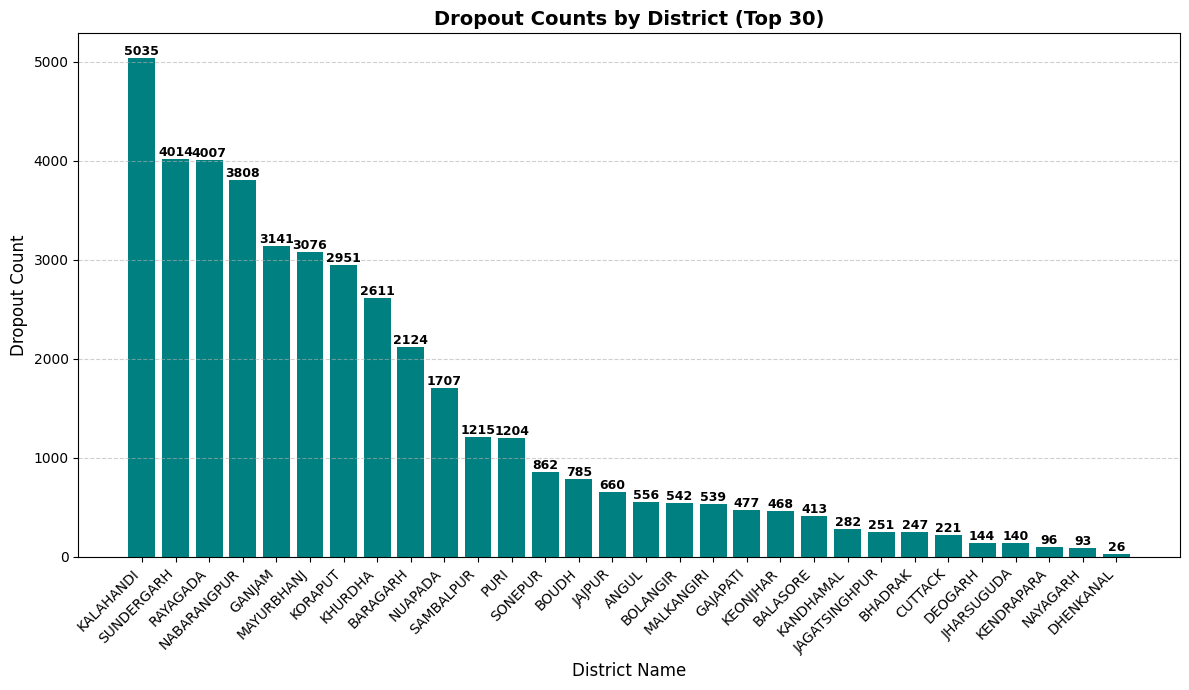

In [18]:
import matplotlib.pyplot as plt

# Check if 'District Name' column exists
if 'District Name' in sheet2_data.columns:
    # Calculate total dropouts by district
    district_wise_counts = sheet2_data['District Name'].value_counts().reset_index()
    district_wise_counts.columns = ['District Name', 'Dropout Count']
else:
    raise ValueError("The required 'District Name' column is not present in the data.")

# Select the first 30 districts for the bar chart
top_30_districts = district_wise_counts.head(30)

# Create a bar chart
plt.figure(figsize=(12, 7))  # Adjusted figure size for better visualization
plt.bar(top_30_districts['District Name'], top_30_districts['Dropout Count'], color='teal')

# Add labels on top of each bar
for index, value in enumerate(top_30_districts['Dropout Count']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Set title and labels
plt.title('Dropout Counts by District (Top 30)', fontsize=14, fontweight='bold')
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Dropout Count', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the layout neatly
plt.tight_layout()

# Save the plot as an image in the specified directory on your computer
plt.savefig('C:/Users/IpsitMohanty/Documents/district_dropout_counts_final.png', dpi=300, bbox_inches='tight')  # Save before plt.show()

# Display the plot
plt.show()


# **1.1 Top 10 Districts with Dropouts**

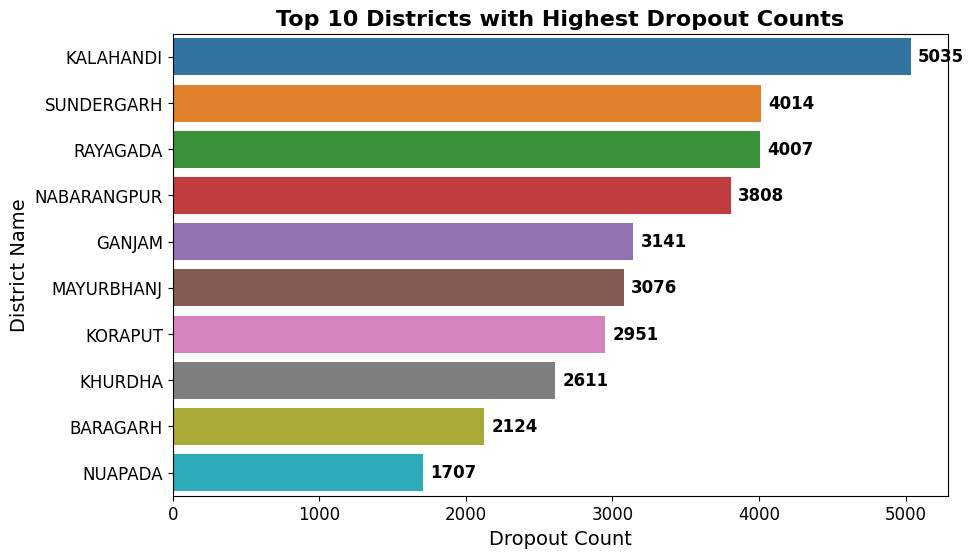

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the districts by dropout count and select the top 10 districts
top_10_districts = district_wise_counts.sort_values(by='Dropout Count', ascending=False).head(10)

# Create the bar plot for top 10 districts
plt.figure(figsize=(10, 6))
sns.barplot(x='Dropout Count', y='District Name', data=top_10_districts, hue='District Name', dodge=False, legend=False)

# Add labels and title to the plot
plt.title('Top 10 Districts with Highest Dropout Counts', fontsize=16, fontweight='bold')
plt.xlabel('Dropout Count', fontsize=14)
plt.ylabel('District Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add dropout count labels on each bar
for index, row in top_10_districts.iterrows():
    plt.text(row['Dropout Count'] + 50, index, f'{int(row["Dropout Count"])}', 
             color='black', ha='left', va='center', fontsize=12, fontweight='bold')

# Save the graph image in the desired directory
image_path = 'C:/Users/IpsitMohanty/Documents/top_10_district_dropout_counts.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# **2. Dropouts by Class**

In [68]:
# Calculate total dropouts by class
class_wise_counts = sheet2_data['Last Class'].value_counts().reset_index()
class_wise_counts.columns = ['Last Class', 'Dropout Count']

# Display the first 10 rows of the result
class_wise_counts.head(10)


,Last Class,Dropout Count
0,10,20552
1,8,8125
2,12,3936
3,9,3896
4,5,1895
5,7,949
6,6,545
7,4,420
8,2,371
9,3,353


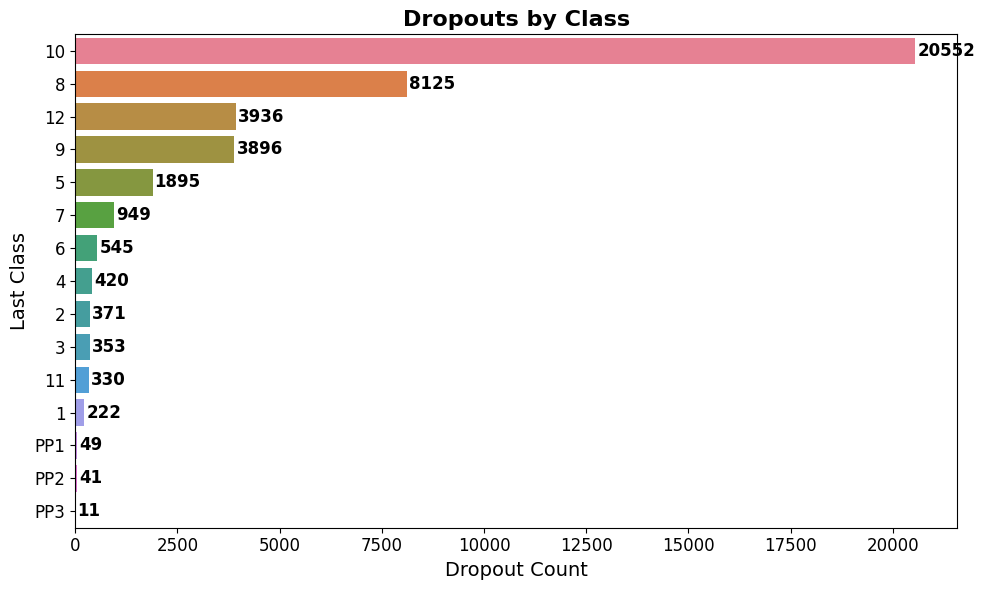

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the classes by dropout count in descending order
class_wise_counts_sorted = class_wise_counts.sort_values(by='Dropout Count', ascending=False)

# Create the bar plot for dropouts by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Dropout Count', y='Last Class', data=class_wise_counts_sorted, hue='Last Class', dodge=False, legend=False)

# Add labels and title to the plot
plt.title('Dropouts by Class', fontsize=16, fontweight='bold')
plt.xlabel('Dropout Count', fontsize=14)
plt.ylabel('Last Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add dropout count labels on each bar
for index, row in class_wise_counts_sorted.iterrows():
    plt.text(row['Dropout Count'] + 50, index, f'{int(row["Dropout Count"])}', 
             color='black', ha='left', va='center', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show() 


# **3. Dropouts By Block**

In [38]:
# Count total dropouts by block
block_wise_counts = sheet2_data['Block Name'].value_counts().reset_index()
block_wise_counts.columns = ['Block Name', 'Dropout Count']

# Display the first 10 rows of the result
print("Block-wise Dropout Counts:")
print(block_wise_counts.head(10))


Block-wise Dropout Counts:
    Block Name  Dropout Count
0     JUNAGARH           1338
1     JHARIGAM           1337
2      KASIPUR           1078
3  RANGEILUNDA            940
4      BETNOTI            833
5    TH RAMPUR            809
6      KHARIAR            674
7  BOIPARIGUDA            664
8     MUNIGUDA            635
9      KOKSARA            619


# **3.1 Top 20 Dropouts By Block**

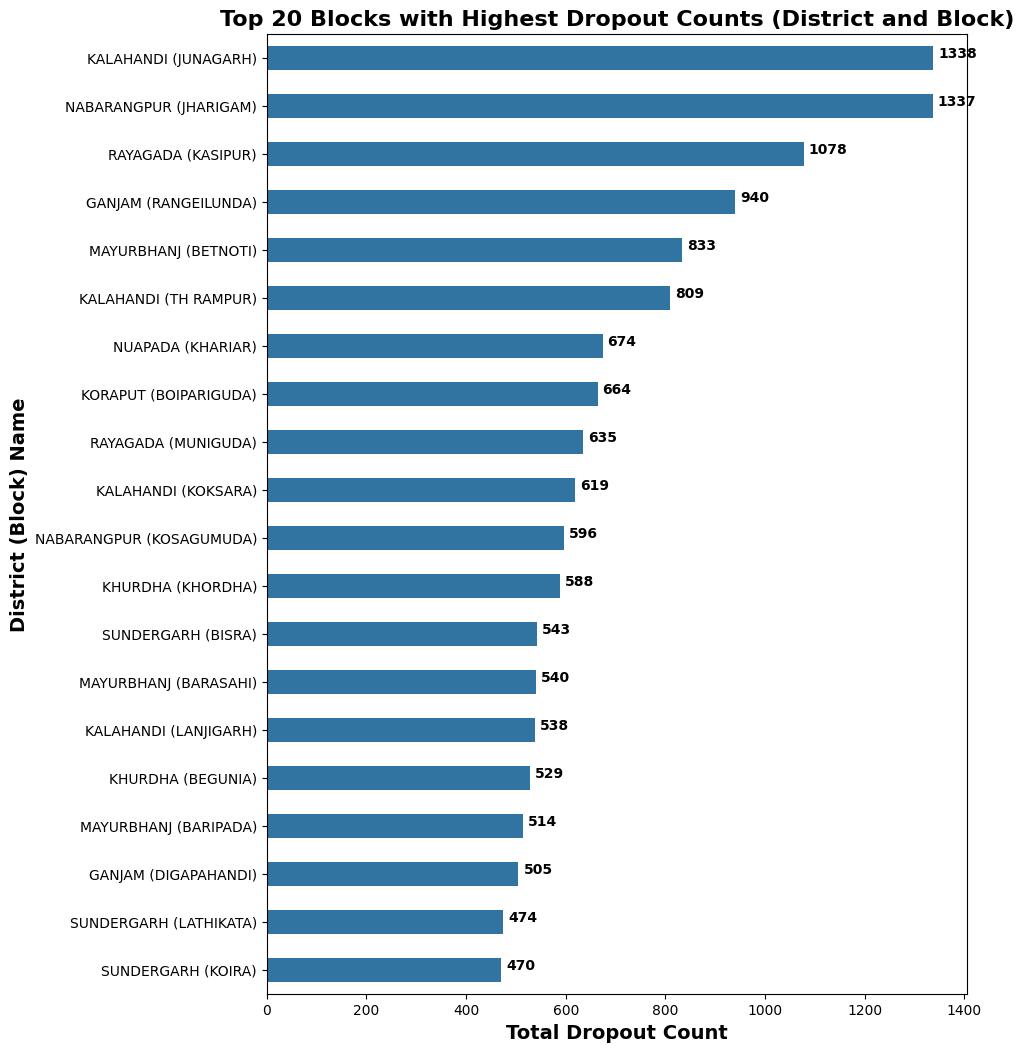

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the uploaded file
file_path = r'C:\Users\IpsitMohanty\Documents\Dropouts 30 dis.xlsx'

# Load the data from 'Sheet2'
sheet2_data = pd.read_excel(file_path, sheet_name='Sheet2')

# **Step 1: Count total dropouts by block**
block_wise_counts = sheet2_data['Block Name'].value_counts().reset_index()
block_wise_counts.columns = ['Block Name', 'Dropout Count']

# **Step 2: Map the blocks to their respective districts**
# Extract unique pairs of Block Name and District Name from the dataset
block_district_mapping = sheet2_data[['Block Name', 'District Name']].drop_duplicates()

# Merge the block-wise dropout counts with the block-district mapping
block_wise_counts = pd.merge(block_wise_counts, block_district_mapping, on='Block Name', how='left')

# **Step 3: Create a combined "District (Block)" label**
block_wise_counts['District-Block'] = block_wise_counts['District Name'] + ' (' + block_wise_counts['Block Name'] + ')'

# Sort by dropout count and select the top 20 blocks
top_20_blocks = block_wise_counts.sort_values(by='Dropout Count', ascending=False).head(20)

# **Step 4: Create the bar plot for the top 20 blocks**
plt.figure(figsize=(10, 12))  # Adjusted size for better readability
sns.barplot(x='Dropout Count', y='District-Block', data=top_20_blocks, color='#1f77b4', dodge=False, width=0.5)  # Single color and thinner bars

# **Add labels and title to the plot**
plt.title('Top 20 Blocks with Highest Dropout Counts (District and Block)', fontsize=16, fontweight='bold')
plt.xlabel('Total Dropout Count', fontsize=14, fontweight='bold')
plt.ylabel('District (Block) Name', fontsize=14, fontweight='bold')

# Customize tick font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  # Reduce font size to make room for district-block names

# **Add dropout count labels on each bar**
for i, row in top_20_blocks.iterrows():
    plt.text(row['Dropout Count'] + 10, i, f'{int(row["Dropout Count"])}', 
             color='black', ha='left', fontsize=10, fontweight='bold')

# **Display the plot with improved margins**
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)  # Custom margins for better fit
plt.show()


# **4. Dropouts by Gender**

In [41]:
# Count the total dropouts by gender
gender_counts = sheet2_data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Dropout Count']

# Display the result
gender_counts


,Gender,Dropout Count
0,MALE,21985
1,FEMALE,19710


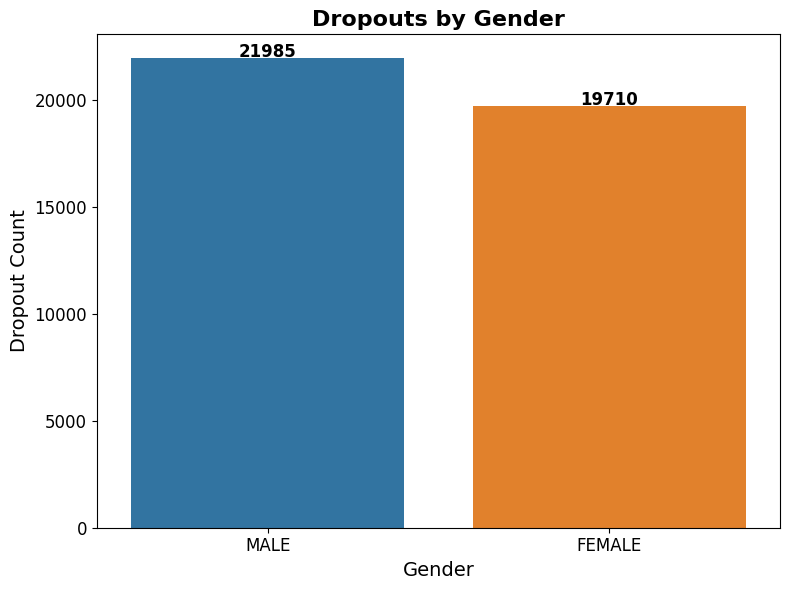

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Dropout Count', data=gender_counts, hue='Gender', dodge=False, legend=False)

# Add labels and title to the plot
plt.title('Dropouts by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Dropout Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add dropout count labels on each bar
for index, row in gender_counts.iterrows():
    plt.text(index, row['Dropout Count'] + 50, f'{int(row["Dropout Count"])}', 
             color='black', ha='center', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


# **4.1 District Wise Gender Dropout Counts**

In [71]:
# Calculate the total dropouts for each district
district_gender_pivot['Total Dropouts'] = district_gender_pivot.sum(axis=1)

# Sort by total dropouts
district_gender_pivot_sorted = district_gender_pivot.sort_values(by='Total Dropouts', ascending=False)

# Display the entire result
display(district_gender_pivot_sorted)

Gender,FEMALE,MALE,Total Dropouts
District Name,,,
KALAHANDI,2467,2568,10070
SUNDERGARH,1884,2130,8028
RAYAGADA,1840,2167,8014
NABARANGPUR,1982,1826,7616
GANJAM,1529,1612,6282
MAYURBHANJ,1411,1665,6152
KORAPUT,1425,1526,5902
KHURDHA,1257,1354,5222
BARAGARH,997,1127,4248


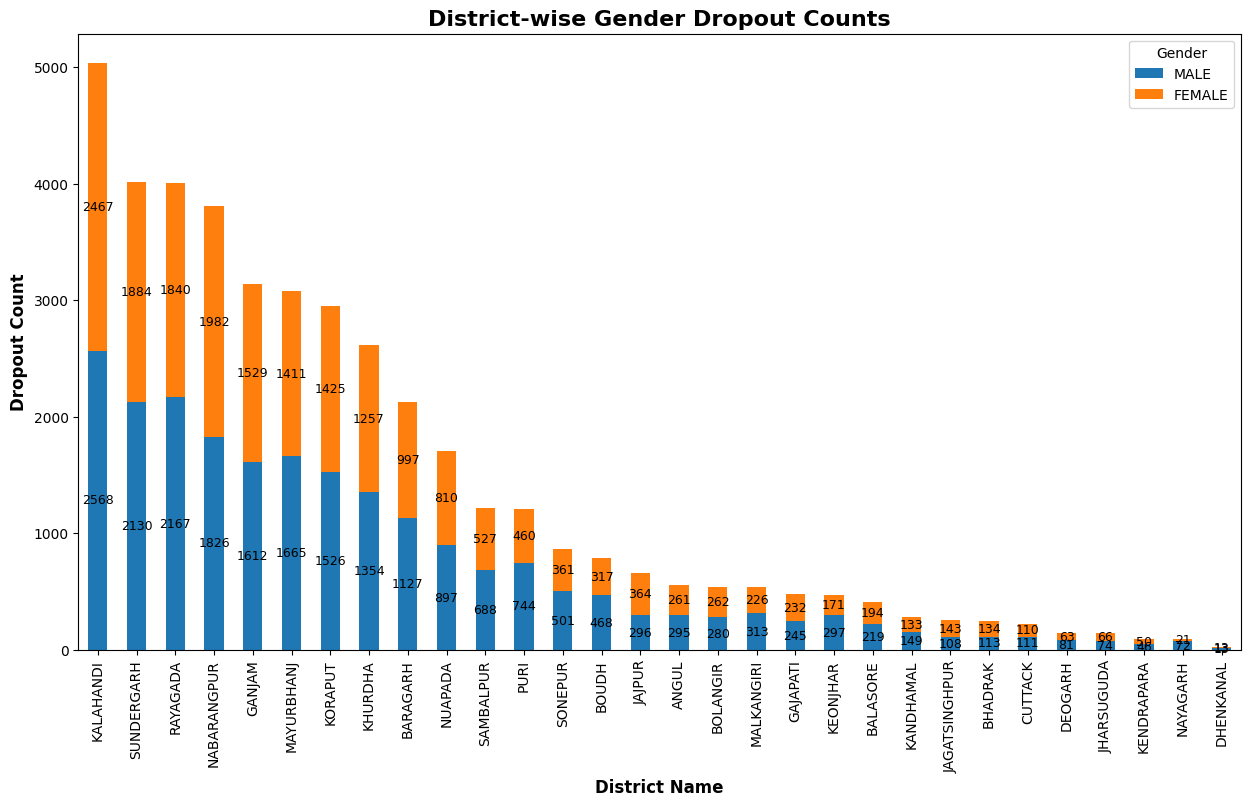

In [70]:
# Plotting the bar chart for all districts
ax = district_gender_pivot_sorted[['MALE', 'FEMALE']].plot(kind='bar', figsize=(15, 8), stacked=True, color=['#1f77b4', '#ff7f0e'])

# Adding the title and labels
plt.title('District-wise Gender Dropout Counts', fontsize=16, fontweight='bold')
plt.xlabel('District Name', fontsize=12, fontweight='bold')
plt.ylabel('Dropout Count', fontsize=12, fontweight='bold')

# Rotate the district names for better readability
plt.xticks(rotation=90)

# Add data labels on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:  # Only label if the bar height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{int(height)}', 
            ha='center', 
            va='center', 
            fontsize=9, 
            color='black'
        )

# Display the plot
plt.show()


# **5. School Wise Dropouts**

In [17]:

# Count total dropouts by school
school_wise_counts = sheet2_data['Last School Name'].value_counts().reset_index()
school_wise_counts.columns = ['School Name', 'Dropout Count']

# Display the first 10 rows of the result
school_wise_counts.head(10)


,School Name,Dropout Count
0,Vedvyas Higher Secondary School Vedvyas,262
1,Gopalpur Higher Secondary School Gopalpur Ga...,261
2,Khallikote Higher Secondary School Berhampur,199
3,Radhaballav Higher Secondary School Bairipur,170
4,Haladia Higher Secondary School Haladia,167
5,Upendra Nath Higher Secondary School Nalagaja,149
6,Rama Mani Higher Secondary School Kantabada,131
7,Basudeba Sethy Science Higher Secondary School...,125
8,Anantanarayana Higher Secondary School Dharakote,113
9,KODABHATTA DNK HS,101


# **6. Dropouts by Father Name, Mother Name, District Name, and Block Name**

In [73]:
# Group dropouts by Father Name, Mother Name, District Name, and Block Name
family_district_block_counts = sheet2_data.groupby(['Father Name', 'Mother Name', 'District Name', 'Block Name']).size().reset_index(name='Dropout Count')

# Filter families with more than 1 dropout
multiple_dropout_families = family_district_block_counts[family_district_block_counts['Dropout Count'] > 1]

# Sort the data by District Name, then by Dropout Count in descending order
multiple_dropout_families_sorted = multiple_dropout_families.sort_values(by=['District Name', 'Dropout Count'], ascending=[True, False])

# Display the result as a clean horizontal table
from IPython.display import display
display(multiple_dropout_families_sorted)


,Father Name,Mother Name,District Name,Block Name,Dropout Count
14931,ISWAR MUNDA,KUMUDINI MUNDA,ANGUL,ATHAMALLIK,2
26414,NIRANJAN NAIK,SUSAMA NAIK,ANGUL,CHHENDIPADA,2
26617,NUHURA NAIK,DEBAKI PATRA,ANGUL,TALCHER,2
31725,RAMESH NAIK,BASANTI NAIK,ANGUL,BANARPAL,2
34319,SANKAR BEHERA,BHARATI BEHERA,ANGUL,PALLAHARA,2
...,...,...,...,...,...
38537,SUNIL KHADIA,LAXMI KHADIA,SUNDERGARH,LATHIKATA,2
38842,SURENDRA SINGH,JASHOMATI SINGH,SUNDERGARH,GURUNDIA,2
39110,SURYA MAJHI,BASANTI MAJHI,SUNDERGARH,LEPHRIPARA,2
39631,TAPAN PATRA,YASHODA PATRA,SUNDERGARH,BONAI,2


In [74]:
# Optional: Export the data to an Excel file
output_path = r'C:\Users\IpsitMohanty\Documents\Multiple_Dropouts_by_Families.xlsx'
multiple_dropout_families_sorted.to_excel(output_path, index=False)

# Print confirmation message
print(f"Table of families with multiple dropouts has been saved to {output_path}")

Table of families with multiple dropouts has been saved to C:\Users\IpsitMohanty\Documents\Multiple_Dropouts_by_Families.xlsx


# **7. Academic Year Trends**

In [58]:
# Import necessary library
import pandas as pd

# Data for Academic Year Dropout Count
data = {
    'Academic Year': ['2023-24', '2024-25'],
    'Dropout Count': [37146, 4549]
}

# Create a DataFrame
academic_year_table = pd.DataFrame(data)

# Display the table
academic_year_table


,Academic Year,Dropout Count
0,2023-24,37146
1,2024-25,4549


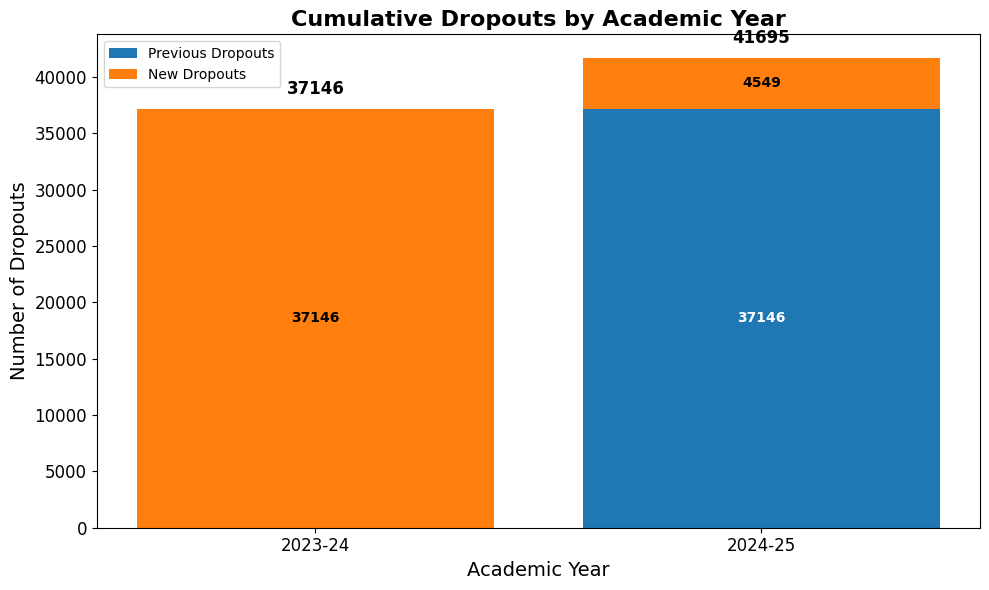

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    'Academic Year': ['2023-24', '2024-25'],
    'Previous Dropouts': [0, 37146],  # No previous for 2023-24, but for 2024-25 it's 2023-24's total
    'New Dropouts': [37146, 4549]     # Total for 2023-24, only new for 2024-25
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Academic Year'], df['Previous Dropouts'], label='Previous Dropouts', color='#1f77b4')
plt.bar(df['Academic Year'], df['New Dropouts'], bottom=df['Previous Dropouts'], label='New Dropouts', color='#ff7f0e')

# Add labels and title
plt.title('Cumulative Dropouts by Academic Year', fontsize=16, fontweight='bold')
plt.xlabel('Academic Year', fontsize=14)
plt.ylabel('Number of Dropouts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels for the total dropouts on top of the stacked bars
for i in range(len(df)):
    total = df['Previous Dropouts'][i] + df['New Dropouts'][i]
    plt.text(i, total + 1000, f'{total}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add the data labels on the individual segments
for i in range(len(df)):
    # Label for Previous Dropouts (only on 2024-25)
    if df['Previous Dropouts'][i] > 0:
        plt.text(i, df['Previous Dropouts'][i] / 2, f'{df["Previous Dropouts"][i]}', color='white', ha='center', va='center', fontsize=10, fontweight='bold')

    # Label for New Dropouts
    if df['New Dropouts'][i] > 0:
        y_pos = df['Previous Dropouts'][i] + (df['New Dropouts'][i] / 2)
        plt.text(i, y_pos, f'{df["New Dropouts"][i]}', color='black', ha='center', va='center', fontsize=10, fontweight='bold')

# Add legend
plt.legend(loc='upper left'

# Display the plot
plt.tight_layout()
plt.show()

